In [31]:
import pandas as pd
import numpy as np
import random, copy
import operator 
from functools import reduce

In [8]:
# ===초기 모집단 생성===

sample_chrm = list(range(1,10)) # a feasible solution 
init_population = [ ] # an empty list 
random.seed(0) 
population_size = 5 

for i in range( population_size ): 
    new_chrm = copy.copy( sample_chrm ) 
    random.shuffle(new_chrm) 
    init_population.append( new_chrm) 

In [9]:
init_population

[[8, 6, 2, 4, 5, 3, 1, 9, 7],
 [3, 1, 4, 9, 7, 2, 5, 6, 8],
 [3, 1, 4, 9, 7, 6, 8, 5, 2],
 [8, 7, 9, 3, 1, 5, 4, 6, 2],
 [2, 7, 6, 1, 3, 5, 9, 8, 4]]

In [11]:
# ===적응도 평가===

#cost matrix 정의
cost_matrix = [] 
cost_matrix.append([0,0,0,0,0,0,0,0,0,0]) 
cost_matrix.append([0,0,1,5,6,9,2,3,7,8]) 
cost_matrix.append([0,1,0,8,6,2,4,7,9,5]) 
cost_matrix.append([0,5,8,0,3,2,7,6,8,9]) 
cost_matrix.append([0,6,6,3,0,9,7,4,1,5]) 
cost_matrix.append([0,9,2,2,9,0,1,4,7,3]) 
cost_matrix.append([0,2,4,7,7,1,0,7,4,1]) 
cost_matrix.append([0,3,7,6,4,4,7,0,8,3]) 
cost_matrix.append([0,7,9,8,1,7,4,8,0,1]) 
cost_matrix.append([0,8,5,9,5,3,1,3,1,0])
cost_matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 5, 6, 9, 2, 3, 7, 8],
 [0, 1, 0, 8, 6, 2, 4, 7, 9, 5],
 [0, 5, 8, 0, 3, 2, 7, 6, 8, 9],
 [0, 6, 6, 3, 0, 9, 7, 4, 1, 5],
 [0, 9, 2, 2, 9, 0, 1, 4, 7, 3],
 [0, 2, 4, 7, 7, 1, 0, 7, 4, 1],
 [0, 3, 7, 6, 4, 4, 7, 0, 8, 3],
 [0, 7, 9, 8, 1, 7, 4, 8, 0, 1],
 [0, 8, 5, 9, 5, 3, 1, 3, 1, 0]]

In [15]:
#비용 계산
chrm = [4, 1, 5, 6, 9, 2, 3, 7, 8] 
cost = 0 
last_city = chrm[0] 
for current_city in chrm: 
    cost += cost_matrix[last_city][current_city] 
    last_city = current_city
 
print(cost)

44


In [21]:
# ===선별===

#누적확률 리스트 생성
fitness_list = [6.0, 9.0, 4.0, 3.0, 5.0, 8.0, 3.0, 6.0, 3.0, 3.0] 
fitness_sum = reduce( operator.add, fitness_list) #누적집계
prob_list = map( (lambda x: x/fitness_sum), fitness_list) 
cum_value = 0 
cum_prob_list = [ ] 
for prob in prob_list: 
    cum_prob_list.append( cum_value + prob ) 
    cum_value += prob 
cum_prob_list[-1] = 1.0 #roundoff error 보정

cum_prob_list

[0.12, 0.3, 0.38, 0.44, 0.54, 0.7000000000000001, 0.76, 0.88, 0.94, 1.0]

In [35]:
#개체 선택(by 선형탐색)
selected = [] 
size = 100 
for i in range(size): 
    rn = random.random() 
    for j, cum_prob in enumerate(cum_prob_list): 
        if rn<= cum_prob: 
            selected.append( j) 
            break
        
selected

[8,
 5,
 0,
 8,
 7,
 0,
 1,
 5,
 7,
 5,
 0,
 1,
 7,
 0,
 1,
 1,
 2,
 2,
 5,
 7,
 7,
 9,
 5,
 4,
 5,
 4,
 3,
 7,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 7,
 0,
 1,
 1,
 5,
 2,
 9,
 1,
 0,
 6,
 8,
 2,
 7,
 6,
 2,
 7,
 1,
 0,
 5,
 4,
 2,
 7,
 7,
 1,
 0,
 4,
 0,
 2,
 5,
 1,
 1,
 5,
 7,
 9,
 0,
 7,
 1,
 1,
 3,
 0,
 5,
 1,
 8,
 7,
 6,
 1,
 0,
 1,
 9,
 5,
 1,
 1,
 0,
 7,
 7,
 0,
 4,
 6,
 1,
 4,
 1,
 5,
 9,
 7]

In [36]:
selected_s = pd.Series(selected)
selected_s.value_counts()

1    24
7    17
0    15
5    13
2    10
4     6
9     5
8     4
6     4
3     2
dtype: int64

In [38]:
# ===교차===

#일점교차
parent1 = [ 1, 0, 1, 1, 0, 1, 1, 1 ] 
parent2 = [ 0, 1, 0, 0, 1, 0, 1, 1 ] 
pt = 3 # crossover point 
offspring1 = parent1[:pt] + parent2[pt:] 
offspring2 = parent2[:pt] + parent1[pt:]
print(offspring1)
print(offspring2)

[1, 0, 1, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 1, 1]


In [40]:
#이점교차
pt1 = 2 # crossover point 1 
pt2 = 5 # crossover point 2 
offspring1 = parent1[:pt1] + parent2[pt1:pt2] + parent1[pt2:] 
offspring2 = parent2[:pt1] + parent1[pt1:pt2] + parent2[pt2:]
print(offspring1)
print(offspring2)

[1, 0, 0, 0, 1, 1, 1, 1]
[0, 1, 1, 1, 0, 0, 1, 1]


In [43]:
#순서교차
parent1 = [4, 1, 5, 6, 9, 2, 3, 7, 8] 
parent2 = [3, 1, 8, 6, 2, 4, 7, 9, 5]
 
pt1 = 2 # crossover point 1 
pt2 = 5 # crossover point 2 
latter_length = len(parent1) - pt2 

prt1_mid = parent1[pt1:pt2] 
prt2_mid = parent2[pt1:pt2] 

prt1_reordered = parent1[pt2:] + parent1[:pt2] 
prt2_reordered = parent2[pt2:] + parent2[:pt2] 

prt1_reord_filtered = list(filter( lambda x: x not in prt2_mid, prt1_reordered )) 
prt2_reord_filtered = list(filter( lambda x: x not in prt1_mid, prt2_reordered )) 

offspring1 = prt2_reord_filtered[-pt1:] + prt1_mid + prt2_reord_filtered[:latter_length] 
offspring2 = prt1_reord_filtered[-pt1:] + prt2_mid + prt1_reord_filtered[:latter_length] 

print(offspring1)
print(offspring2)

[8, 2, 5, 6, 9, 4, 7, 3, 1]
[5, 9, 8, 6, 2, 3, 7, 4, 1]


In [47]:
# ===돌연변이===

#삽입
chrm = [4, 1, 5, 6, 9, 2, 3, 7, 8] 
element_position = random.randint(0, len(chrm)-1 ) 
insert_position = random.randint(0, len(chrm)-2 ) 
element_value = chrm[element_position] 
del chrm[element_position] 
chrm.insert( insert_position, element_value )
print(element_position, insert_position, chrm)

8 2 [4, 1, 8, 5, 6, 9, 2, 3, 7]


In [49]:
#교환
chrm = [4, 1, 5, 6, 9, 2, 3, 7, 8] 
position1 = random.randint(0, len(chrm)-1 ) 
position2 = random.randint(0, len(chrm)-1 ) 
chrm[position1], chrm[position2] = chrm[position2], chrm[position1]
print(position1, position2, chrm)

2 6 [4, 1, 3, 6, 9, 2, 5, 7, 8]


---

### PyGAD test

In [2]:
pip install pygad

     |████████████████████████████████| 55 kB 2.3 MB/s  eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.6/dist-packages/pygad/pygad.py:473: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = -42.66521818454604
Change     = -42.66521818454604
Generation = 2
Fitness    = -35.18665372874028
Change     = 7.47856445580576
Generation = 3
Fitness    = -16.93557055046527
Change     = 18.251083178275014
Generation = 4
Fitness    = -16.93557055046527
Change     = 0.0
Generation = 5
Fitness    = -4.170102707750435
Change     = 12.765467842714834
Generation = 6
Fitness    = -4.170102707750435
Change     = 0.0
Generation = 7
Fitness    = -1.5471468608011272
Change     = 2.622955846949308
Generation = 8
Fitness    = -1.5471468608011272
Change     = 0.0
Generation = 9
Fitness    = -1.5471468608011272
Change     = 0.0
Generation = 10
Fitness    = -1.5471468608011272
Change     = 0.0
Generation = 11
Fitness    = -1.5471468608011272
Change     = 0.0
Generation = 12
Fitness    = -1.5471468608011272
Change     = 0.0
Generation = 13
Fitness    = -1.5471468608011272
Change     = 0.0
Generation = 14
Fitness    = -1.1500134630467045
Change     = 0.3971333977544227
Gene

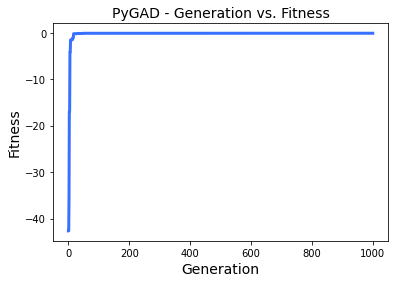

Solution [0.64838361 0.41992586]
Fitness value of the best solution = -0.12365669133194629


In [3]:
import pygad

def fitness_func(solution, solution_idx):
    x = solution[0]
    y = solution[1]
    Z = -(100*(x**2 - y)**2 + (1 - x)**2)
    return Z

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=1000,
                       num_parents_mating=5,
                       sol_per_pop=10,
                       num_genes=2,
                       gene_space={"low": -2, "high": 2},
                       mutation_by_replacement=True,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

ga_instance.run()

ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Solution", solution)
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))